# IV - Transferencia de Aprendizaje (b)

## Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100

## Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
n_classes = np.max(np.unique(y_train)) + 1

In [3]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [4]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding

## Modelo

In [6]:
# ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [8]:
model = Sequential()
model.add(Input(shape=x_train.shape[1:]))
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(n_classes, activation='softmax'))

In [9]:
for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

## Cargar pesos del modelo y hacer predicciones

In [10]:
# Create a new model instance
model.load_weights('./src/ResNet50_cifar100.h5')
y_pred = model.predict(x_test, verbose=1)

10000/10000 [==============================] - 82s 8ms/sample


## Conversion a categorias numericas y matriz de confusión

In [11]:
y_true = np.argmax(y_test, axis=1) 
y_model = np.argmax(y_pred, axis=1)
CM = confusion_matrix(y_true, y_model)

## Nombres de las categorias y grafico de la matriz

In [12]:
str_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
              'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
              'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
              'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
              'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
              'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
              'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
              'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
              'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
              'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
              'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

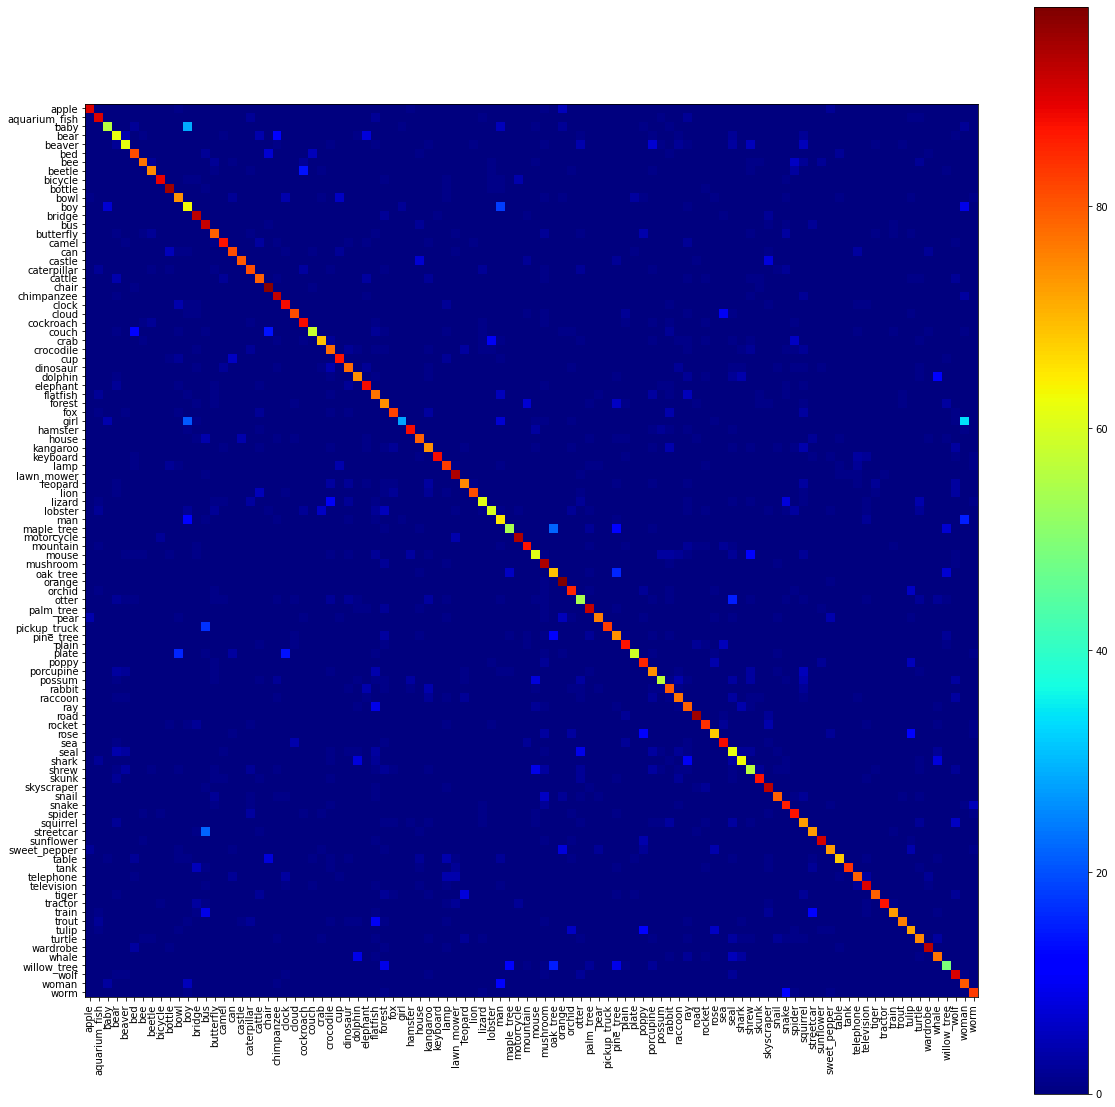

In [13]:
f = plt.figure(figsize=(20,20))
plt.imshow(CM, cmap='jet')
plt.xticks(np.arange(100), str_labels,rotation=90)  # Set text labels and properties.
plt.yticks(np.arange(100), str_labels,rotation=0)  # Set text labels and properties.
plt.colorbar()
plt.show()